In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import json

In [2]:
with open('matches.json', 'r') as f:
    data = json.load(f)

In [3]:
matches = pd.DataFrame(data)
matches.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,league,radiant_team,dire_team,players,patch,region,all_word_counts,my_word_counts,throw,loss,replay_url,comeback,stomp
0,7033957142,3,63,"[{'time': -573, 'type': 'chatwheel', 'key': '1...",251,"{'647': 0, '4571': 4, '6590': 132, '6616': 131...",17,4,"[{'order': 1, 'pick': False, 'active_team': 2,...",1990,1,234,2,10,15089,1,5905378126,0,"[{'time': 48, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 61, 'team': 1, ...",0,"[0, -181, -63, -193, 44, -293, -528, 671, 693,...",28,15,True,"[0, -126, -109, -259, 543, 168, -90, 1024, 114...",None,1677353830,"[{'start': 415, 'end': 457, 'last_death': 442,...",1540,1847,21,1943110293,754127,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...","{'team_id': 4, 'name': 'EHOME', 'tag': 'EHOME'...","[{'match_id': 7033957142, 'player_slot': 0, 'a...",51,15,"{'ka': 1, 'g': 2, 'gg': 3, 'wp': 1}",{},528.0,25046.0,http://replay251.valve.net/570/7033957142_1943...,NaN,NaN
1,7044395618,0,63,"[{'time': -82, 'type': 'chat', 'key': 'Glhf', ...",251,"{'647': 1, '746': 2, '4212': 1, '4387': 131, '...",13,2163,"[{'order': 1, 'pick': False, 'active_team': 3,...",2049,1,335,2,10,15089,1,5914595219,0,"[{'time': 194, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...",0,"[-100, -104, -260, -76, -176, -139, 371, -389,...",43,8599101,True,"[-48, 84, -99, -189, 9, 55, 240, 302, 753, 142...",None,1677957541,"[{'start': 840, 'end': 880, 'last_death': 865,...",1536,1846,21,880536839,756434,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'match_id': 7044395618, 'player_slot': 0, 'a...",51,15,"{'glhf': 3, 'glgl': 2, 'hfhf': 1, 'guys': 1, '...",{},437.0,30477.0,http://replay251.valve.net/570/7044395618_8805...,NaN,NaN
2,7046266928,63,0,"[{'time': -200, 'type': 'chatwheel', 'key': '1...",251,"{'647': 131, '4740': 3, '4794': 129, '4998': 1...",34,8599101,"[{'order': 1, 'pick': False, 'active_team': 2,...",2712,1,254,2,10,15089,1,5916272291,0,"[{'time': 79, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 52, 'team': 0, ...",0,"[0, 320, 441, 240, 323, -390, -399, -759, -124...",18,2163,False,"[0, -117, 188, 112, -44, -710, -704, -938, -11...",None,1678048891,"[{'start': 1273, 'end': 1314, 'last_death': 12...",1974,1536,21,2054544148,756930,2,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","[{'match_id': 7046266928, 'player_slot': 0, 'a...",51,15,"{'glhf': 5, 'glgl': 1, 'real': 1, 'jabbz': 1, ...",{},NaN,NaN,http://replay251.valve.net/570/7046266928_2054...,441.0,33093.0
3,7044549780,48,63,"[{'time': -610, 'type': 'chatwheel', 'key': '1...",251,"{'630': 130, '647': 128, '4794': 3, '5820': 0,...",9,39,"[{'order': 1, 'pick': False, 'active_team': 3,...",2055,1,56,2,10,15089,1,5914740630,0,"[{'time': 47, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 65, 'team': 1, ...",0,"[0, 472, 561, 853, 1053, 707, 437, -241, -181,...",38,8597976,True,"[0, 23, 104, 369, 251, 300, 229, -352, -282, -...",None,1677965431,"[{'start': 887, 'end': 920, 'last_death': 905,...",1792,1975,21,1867172704,756512,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","{'team_id': 39, 'name': 'Shopify Rebellion', '...","[{'match_id': 7044549780, 'player_slot': 0, 'a...",51,15,"{'glhf': 2, 'hf': 2, 'sec'

In [4]:
matches.columns

Index(['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'chat',
       'cluster', 'cosmetics', 'dire_score', 'dire_team_id', 'draft_timings',
       'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players',
       'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes',
       'objectives', 'picks_bans', 'positive_votes', 'radiant_gold_adv',
       'radiant_score', 'radiant_team_id', 'radiant_win', 'radiant_xp_adv',
       'skill', 'start_time', 'teamfights', 'tower_status_dire',
       'tower_status_radiant', 'version', 'replay_salt', 'series_id',
       'series_type', 'league', 'radiant_team', 'dire_team', 'players',
       'patch', 'region', 'all_word_counts', 'my_word_counts', 'throw', 'loss',
       'replay_url', 'comeback', 'stomp'],
      dtype='object')

In [5]:
features_to_drop = [
    # list features
    'cosmetics', 'draft_timings', 'teamfights', 'league',
    'all_word_counts', 'my_word_counts',
    # non-list features
    'barracks_status_radiant', 'barracks_status_dire', 'cluster',
    'radiant_team_id', 'dire_team_id', 'engine', 'first_blood_time',
    'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num',
    'negative_votes', 'positive_votes', 'skill', 'start_time', 
    'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt',
    'series_id', 'series_type', 'patch', 'region', 'throw', 'loss',
    'replay_url', 'comeback', 'stomp',
    # drop after further investigation
    'chat'
]

In [6]:
matches_reduced = matches.drop(features_to_drop, axis=1)
matches_reduced.head(10)

,match_id,dire_score,duration,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_win,radiant_xp_adv,radiant_team,dire_team,players
0,7033957142,17,1990,"[{'time': 48, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 61, 'team': 1, ...","[0, -181, -63, -193, 44, -293, -528, 671, 693,...",28,True,"[0, -126, -109, -259, 543, 168, -90, 1024, 114...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...","{'team_id': 4, 'name': 'EHOME', 'tag': 'EHOME'...","[{'match_id': 7033957142, 'player_slot': 0, 'a..."
1,7044395618,13,2049,"[{'time': 194, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...","[-100, -104, -260, -76, -176, -139, 371, -389,...",43,True,"[-48, 84, -99, -189, 9, 55, 240, 302, 753, 142...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'match_id': 7044395618, 'player_slot': 0, 'a..."
2,7046266928,34,2712,"[{'time': 79, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","[0, 320, 441, 240, 323, -390, -399, -759, -124...",18,False,"[0, -117, 188, 112, -44, -710, -704, -938, -11...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","[{'match_id': 7046266928, 'player_slot': 0, 'a..."
3,7044549780,9,2055,"[{'time': 47, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 65, 'team': 1, ...","[0, 472, 561, 853, 1053, 707, 437, -241, -181,...",38,True,"[0, 23, 104, 369, 251, 300, 229, -352, -282, -...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","{'team_id': 39, 'name': 'Shopify Rebellion', '...","[{'match_id': 7044549780, 'player_slot': 0, 'a..."
4,7046340157,6,1273,"[{'time': -7, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...","[308, 796, 712, 705, 666, 1316, 1596, 1978, 22...",27,True,"[100, 71, -52, 391, 498, 1446, 1837, 2002, 249...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'match_id': 7046340157, 'player_slot': 0, 'a..."
5,7046378132,31,2536,"[{'time': 40, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'is_pick': False, 'hero_id': 53, 'team': 1, ...","[0, 313, 127, -561, 162, -93, -109, -23, 449, ...",19,False,"[0, 304, 292, -423, 308, 140, 160, 318, 961, 2...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","[{'match_id': 7046378132, 'player_slot': 0, 'a..."
6,7042758933,38,3317,"[{'time': 259, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 137, 'team': 1,...","[0, 28, 254, 76, 456, 1261, 1238, 1664, 1808, ...",33,False,"[0, 14, 262, -87, 285, 909, 485, 1231, 2011, 1...","{'team_id': 7119388, 'name': 'Team Spirit', 't...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","[{'match_id': 7042758933, 'player_slot': 0, 'a..."
7,7044685001,51,2684,"[{'time': 176, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 65, 'team': 0, ...","[0, 112, 108, 45, -150, -49, 64, 148, 201, 86,...",13,False,"[0, 86, 95, 181, 21, 82, 254, -159, -136, -103...","{'team_id': 39, 'name': 'Shopify Rebellion', '...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","[{'match_id': 7044685001, 'player_slot': 0, 'a..."
8,7032470023,8,1939,"[{'time': -26, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 65, 'team': 0, ...","[35, 299, 568, 841, 1211, 1746, 1822, 2228, 24...",27,True,"[-50, -232, 96, 217, 185, 699, 702, 1062, 1132...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","{'team_id': 8169775, 'name': 'Geek Slate', 'ta...","[{'match_id': 7032470023, 'player_slot': 0, 'a..."
9,7042875903,34,2397,"[{'time': 26, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'is_pick': False, 'hero_id': 33, 'team': 0, ...","[0, 277, 52, -740, -1028, -946, -804, -1104, -...",13,False,"[0, 174, 133, -801, -640, -421, -118, -728, -5...","{'team_id': 8255756, 'name': 'Evil Geniuses', ...","{'team_id': 39, 'name': 'Shopi

In [7]:
unique_obj_msg = set([x['type'] for y in matches['objectives'] for x in y])
unique_obj_msg

{'CHAT_MESSAGE_AEGIS',
 'CHAT_MESSAGE_AEGIS_STOLEN',
 'CHAT_MESSAGE_COURIER_LOST',
 'CHAT_MESSAGE_FIRSTBLOOD',
 'CHAT_MESSAGE_ROSHAN_KILL',
 'building_kill'}

In [8]:
rosh_timings = [(x['time'], True if x['team'] == 2 else False) for x in matches['objectives'][0] if 'roshan' in x['type'].lower()]
rosh_timings

[(1062, True), (1672, True)]

In [9]:
courier_kills = [(x['time'], x['team'], True if x['killer'] == -1 else False) for x in matches['objectives'][0] if 'courier' in x['type'].lower()]
courier_kills

[(48, 2, False),
 (179, 3, False),
 (201, 2, False),
 (245, 2, False),
 (315, 3, True),
 (737, 2, True),
 (1778, 3, False)]

In [10]:
for i in range(len(matches)):
    aegis_lost = [x for x in matches['objectives'][i] if 'stolen' in x['type'].lower()]
    if len(aegis_lost) > 0:
        print(i, aegis_lost)
        break

0 [{'time': 1062, 'type': 'CHAT_MESSAGE_AEGIS_STOLEN', 'slot': 9, 'player_slot': 132}]


In [11]:
aegis_stolen = [True if x['player_slot'] < 128 else False for x in matches['objectives'][0] if 'stolen' in x['type'].lower()]
aegis_stolen

[False]

In [12]:
building_kills = [(x['time'], x['key']) for x in matches['objectives'][0] if 'building' in x['type'].lower()]
building_kills

[(590, 'npc_dota_badguys_tower1_top'),
 (603, 'npc_dota_goodguys_tower1_bot'),
 (750, 'npc_dota_badguys_tower1_mid'),
 (1001, 'npc_dota_goodguys_tower1_mid'),
 (1190, 'npc_dota_goodguys_tower2_bot'),
 (1476, 'npc_dota_badguys_tower2_top'),
 (1831, 'npc_dota_badguys_tower1_bot'),
 (1852, 'npc_dota_badguys_tower2_bot'),
 (1862, 'npc_dota_badguys_tower2_mid'),
 (1875, 'npc_dota_badguys_tower3_bot'),
 (1902, 'npc_dota_badguys_melee_rax_bot'),
 (1906, 'npc_dota_badguys_range_rax_bot'),
 (1961, 'npc_dota_badguys_tower3_mid'),
 (1968, 'npc_dota_badguys_melee_rax_mid'),
 (1974, 'npc_dota_badguys_range_rax_mid'),
 (1990, 'npc_dota_badguys_fort')]

In [13]:
def extract_rosh_kills(objectives):
    rosh_kill_timings_radiant = [
        x['time']
        for x in objectives if 'roshan' in x['type'].lower() and x['team'] == 2
    ]
    rosh_kill_timings_dire = [
        x['time']
        for x in objectives if 'roshan' in x['type'].lower() and x['team'] == 3
    ]
    
    return rosh_kill_timings_radiant, rosh_kill_timings_dire

In [14]:
rosh_timings = matches['objectives'].apply(lambda x: extract_rosh_kills(x))
df_rosh_timings = pd.DataFrame(rosh_timings.to_list(), columns=['radiant_rosh_time', 'dire_rosh_time'])
df_rosh_timings

,radiant_rosh_time,dire_rosh_time
0,"[1062, 1672]",[]
1,"[1004, 1722]",[]
2,[],"[1183, 1911, 2603]"
3,"[1372, 1912]",[]
4,[1124],[]
...,...,...
188,[],[1359]
189,[2703],"[1369, 2090]"
190,[],"[1008, 1644, 2229, 2808]"
191,[],[1106]


In [15]:
df_rosh_timings['radiant_rosh_time'].apply(len).sum()

206

In [16]:
df_rosh_timings['dire_rosh_time'].apply(len).sum()

236

In [17]:
def extract_courier_kills(objectives):
    courier_kills_radiant = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 3 and x['killer'] >= 0
        )
    ]
    courier_kills_dire = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 2 and x['killer'] >= 0
        )
    ]
    courier_kills_radiant_creeps = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 3 and x['killer'] < 0
        )
    ]
    courier_kills_dire_creeps = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 2 and x['killer'] < 0
        )
    ]
    
    return courier_kills_radiant, courier_kills_radiant_creeps, courier_kills_dire, courier_kills_dire_creeps

In [18]:
courier_kills = matches['objectives'].apply(lambda x: extract_courier_kills(x))
df_courier_kills = pd.DataFrame(
    courier_kills.to_list(),
    columns=[
        'radiant_courier_kills', 'radiant_courier_kills_creeps',
        'dire_courier_kills', 'dire_courier_kills_creeps'
    ]
)
df_courier_kills

,radiant_courier_kills,radiant_courier_kills_creeps,dire_courier_kills,dire_courier_kills_creeps
0,"[179, 1778]",[315],"[48, 201, 245]",[737]
1,"[529, 2046]",[],[194],[]
2,"[79, 573, 1298, 2215]",[],[],[]
3,[1229],[],"[47, 273, 919]",[]
4,[],[],[520],[]
...,...,...,...,...
188,[],[],[],[]
189,"[135, 2121]",[],[827],[]
190,[],[],[2666],[]
191,"[190, 711, 739]",[],"[69, 71]",[]


In [19]:
df_courier_kills['radiant_courier_kills'].apply(len).sum()

303

In [20]:
df_courier_kills['radiant_courier_kills_creeps'].apply(len).sum()

29

In [21]:
df_courier_kills['dire_courier_kills'].apply(len).sum()

384

In [22]:
df_courier_kills['dire_courier_kills_creeps'].apply(len).sum()

26

In [23]:
def extract_aegis_stolen(objectives):
    aegis_stolen_radiant = [
        x['time'] for x in objectives if (
            'stolen' in x['type'].lower() and x['player_slot'] < 128
        )
    ]
    aegis_stolen_dire = [
        x['time'] for x in objectives if (
            'stolen' in x['type'].lower() and x['player_slot'] >= 128
        )
    ]
    
    return aegis_stolen_radiant, aegis_stolen_dire

In [24]:
aegis_stolen = matches['objectives'].apply(lambda x: extract_aegis_stolen(x))
df_aegis_stolen = pd.DataFrame(
    aegis_stolen.to_list(),
    columns=['radiant_aegis_stolen', 'dire_aegis_stolen']
)
df_aegis_stolen

,radiant_aegis_stolen,dire_aegis_stolen
0,[],[1062]
1,[],[]
2,[],[]
3,[],[]
4,[],[]
...,...,...
188,[],[]
189,[],[]
190,[],[]
191,[],[]


In [25]:
df_aegis_stolen['radiant_aegis_stolen'].apply(len).sum()

6

In [26]:
df_aegis_stolen['dire_aegis_stolen'].apply(len).sum()

8

In [27]:
[(x['time'], x['key']) for x in matches['objectives'][0] if 'building' in x['type'].lower()]

[(590, 'npc_dota_badguys_tower1_top'),
 (603, 'npc_dota_goodguys_tower1_bot'),
 (750, 'npc_dota_badguys_tower1_mid'),
 (1001, 'npc_dota_goodguys_tower1_mid'),
 (1190, 'npc_dota_goodguys_tower2_bot'),
 (1476, 'npc_dota_badguys_tower2_top'),
 (1831, 'npc_dota_badguys_tower1_bot'),
 (1852, 'npc_dota_badguys_tower2_bot'),
 (1862, 'npc_dota_badguys_tower2_mid'),
 (1875, 'npc_dota_badguys_tower3_bot'),
 (1902, 'npc_dota_badguys_melee_rax_bot'),
 (1906, 'npc_dota_badguys_range_rax_bot'),
 (1961, 'npc_dota_badguys_tower3_mid'),
 (1968, 'npc_dota_badguys_melee_rax_mid'),
 (1974, 'npc_dota_badguys_range_rax_mid'),
 (1990, 'npc_dota_badguys_fort')]

In [28]:
all_building_types = list(set([x['key'] for y in matches['objectives'] for x in y if 'building' in x['type'].lower()]))
all_building_types.sort()
renamed_building_types = []
for idx, building_type in enumerate(all_building_types):
    new_building_name = building_type \
        .split('_', 2)[-1] \
        .replace('badguys', 'dire') \
        .replace('goodguys', 'radiant')
    if 'tower4' in new_building_name:
        renamed_building_types.append(new_building_name + '_first')
    else:
        renamed_building_types.append(new_building_name)
renamed_building_types.extend(['dire_tower4_second', 'radiant_tower4_second'])

renamed_building_types

['dire_fort',
 'dire_melee_rax_bot',
 'dire_melee_rax_mid',
 'dire_melee_rax_top',
 'dire_range_rax_bot',
 'dire_range_rax_mid',
 'dire_range_rax_top',
 'dire_tower1_bot',
 'dire_tower1_mid',
 'dire_tower1_top',
 'dire_tower2_bot',
 'dire_tower2_mid',
 'dire_tower2_top',
 'dire_tower3_bot',
 'dire_tower3_mid',
 'dire_tower3_top',
 'dire_tower4_first',
 'radiant_fort',
 'radiant_melee_rax_bot',
 'radiant_melee_rax_mid',
 'radiant_melee_rax_top',
 'radiant_range_rax_bot',
 'radiant_range_rax_mid',
 'radiant_range_rax_top',
 'radiant_tower1_bot',
 'radiant_tower1_mid',
 'radiant_tower1_top',
 'radiant_tower2_bot',
 'radiant_tower2_mid',
 'radiant_tower2_top',
 'radiant_tower3_bot',
 'radiant_tower3_mid',
 'radiant_tower3_top',
 'radiant_tower4_first',
 'dire_tower4_second',
 'radiant_tower4_second']

In [29]:
def extract_building_kills(objectives):
    # tier 4 towers are not seperated -> divide into first and second
    building_lists = [None for _ in  range(len(all_building_types) + 2)]
    for idx, building in enumerate(all_building_types):
        building_kill = [
            x['time'] for x in objectives if (
                'building' in x['type'].lower() and building == x['key']
            )
        ]
        if len(building_kill) == 0:
            continue
        if 'tower4' in building:
            building_lists[idx] = building_kill[0]
            if len(building_kill) == 2:
                if 'bad' in building:
                    building_lists[-2] = building_kill[1]
                else:
                    building_lists[-1] = building_kill[1]
        else:
            building_lists[idx] = building_kill[0]
        
    return building_lists

In [30]:
test = all_building_types + ['dir_sec', 'rad_sec']
list(zip(extract_building_kills(matches['objectives'].iloc[-1]), test))

[(None, 'npc_dota_badguys_fort'),
 (None, 'npc_dota_badguys_melee_rax_bot'),
 (None, 'npc_dota_badguys_melee_rax_mid'),
 (None, 'npc_dota_badguys_melee_rax_top'),
 (None, 'npc_dota_badguys_range_rax_bot'),
 (None, 'npc_dota_badguys_range_rax_mid'),
 (None, 'npc_dota_badguys_range_rax_top'),
 (None, 'npc_dota_badguys_tower1_bot'),
 (990, 'npc_dota_badguys_tower1_mid'),
 (832, 'npc_dota_badguys_tower1_top'),
 (None, 'npc_dota_badguys_tower2_bot'),
 (None, 'npc_dota_badguys_tower2_mid'),
 (2453, 'npc_dota_badguys_tower2_top'),
 (None, 'npc_dota_badguys_tower3_bot'),
 (None, 'npc_dota_badguys_tower3_mid'),
 (None, 'npc_dota_badguys_tower3_top'),
 (None, 'npc_dota_badguys_tower4'),
 (2723, 'npc_dota_goodguys_fort'),
 (2661, 'npc_dota_goodguys_melee_rax_bot'),
 (2646, 'npc_dota_goodguys_melee_rax_mid'),
 (2633, 'npc_dota_goodguys_melee_rax_top'),
 (2654, 'npc_dota_goodguys_range_rax_bot'),
 (2649, 'npc_dota_goodguys_range_rax_mid'),
 (2652, 'npc_dota_goodguys_range_rax_top'),
 (805, 'npc_dot

In [31]:

building_kills = matches['objectives'].apply(lambda x: extract_building_kills(x))
df_building_kills = pd.DataFrame(
    building_kills.to_list(),
    columns=renamed_building_types
)
df_building_kills

,dire_fort,dire_melee_rax_bot,dire_melee_rax_mid,dire_melee_rax_top,dire_range_rax_bot,dire_range_rax_mid,dire_range_rax_top,dire_tower1_bot,dire_tower1_mid,dire_tower1_top,dire_tower2_bot,dire_tower2_mid,dire_tower2_top,dire_tower3_bot,dire_tower3_mid,dire_tower3_top,dire_tower4_first,radiant_fort,radiant_melee_rax_bot,radiant_melee_rax_mid,radiant_melee_rax_top,radiant_range_rax_bot,radiant_range_rax_mid,radiant_range_rax_top,radiant_tower1_bot,radiant_tower1_mid,radiant_tower1_top,radiant_tower2_bot,radiant_tower2_mid,radiant_tower2_top,radiant_tower3_bot,radiant_tower3_mid,radiant_tower3_top,radiant_tower4_first,dire_tower4_second,radiant_tower4_second
0,1990.0,1902.0,1968.0,NaN,1906.0,1974.0,NaN,1831.0,750.0,590.0,1852.0,1862.0,1476.0,1875.0,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603.0,1001.0,NaN,1190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2049.0,2010.0,1828.0,1847.0,1991.0,1830.0,1849.0,1235.0,874.0,646.0,1931.0,1444.0,1019.0,1978.0,1638.0,1838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,737.0,1299.0,522.0,1564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642.0,1669.0,1913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2713.0,2675.0,2649.0,2265.0,2672.0,2645.0,2258.0,563.0,867.0,1098.0,2014.0,2049.0,2171.0,2664.0,2643.0,2199.0,NaN,NaN,NaN
3,2055.0,NaN,2053.0,1964.0,NaN,2055.0,1965.0,974.0,1257.0,833.0,1269.0,1564.0,1518.0,NaN,2047.0,1956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,759.0,870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1274.0,NaN,NaN,NaN,NaN,NaN,NaN,1054.0,955.0,818.0,NaN,NaN,1184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.0,545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590.0,1584.0,NaN,NaN,1583.0,NaN,NaN,629.0,1005.0,1424.0,1506.0,NaN,NaN,1544.0,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2564.0,882.0,NaN,NaN,2759.0,NaN,NaN,NaN,NaN,3007.0,2469.0,2207.0,2946.0,2470.0,2209.0,2950.0,844.0,1340.0,1193.0,1455.0,1594.0,1817.0,2464.0,2193.0,2485.0,2967.0,NaN,2979.0
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538.0,542.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2942.0,NaN,2849.0,2567.0,NaN,2853.0,2570.0,781.0,1197.0,1874.0,1392.0,2254.0,2551.0,2941.0,2276.0,2563.0,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1586.0,NaN,NaN,NaN,NaN,NaN,NaN,597.0,663.0,1493.0,1230.0,1330.0,NaN,1581.0,1345.0,NaN,NaN,NaN,NaN


In [32]:
df_building_kills['dire_tower1_mid'].describe()

count     171.000000
mean      990.584795
std       386.335373
min       409.000000
25%       721.500000
50%       914.000000
75%      1178.500000
max      2564.000000
Name: dire_tower1_mid, dtype: float64

In [33]:
df_building_kills['dire_tower1_mid'][df_building_kills['dire_tower1_mid'].notna()].describe()

count     171.000000
mean      990.584795
std       386.335373
min       409.000000
25%       721.500000
50%       914.000000
75%      1178.500000
max      2564.000000
Name: dire_tower1_mid, dtype: float64

In [34]:
def extract_first_blood(objectives):
    radiant_first_blood = [
        x['time'] for x in objectives if (
            'first' in x['type'].lower() and x['player_slot'] < 128
        )
    ]
    dire_first_blood = [
        x['time'] for x in objectives if (
            'first' in x['type'].lower() and x['player_slot'] >= 128
        )
    ]
    return (
        radiant_first_blood[0] if len(radiant_first_blood) else np.nan,
        dire_first_blood[0] if len(dire_first_blood) else np.nan
    )

In [35]:
first_blood = matches['objectives'].apply(extract_first_blood)
df_first_blood = pd.DataFrame(
    first_blood.to_list(),
    columns=['radiant_first_blood', 'dire_first_blood']
)
df_first_blood.head()

,radiant_first_blood,dire_first_blood
0,234.0,NaN
1,336.0,NaN
2,255.0,NaN
3,56.0,NaN
4,-7.0,NaN


In [36]:
df_first_blood['radiant_first_blood'].describe()

count    101.000000
mean     135.871287
std      113.369808
min      -46.000000
25%       54.000000
50%      122.000000
75%      216.000000
max      373.000000
Name: radiant_first_blood, dtype: float64

In [37]:
df_first_blood['dire_first_blood'].describe()

count     84.000000
mean     173.130952
std      116.462288
min      -47.000000
25%       95.750000
50%      180.000000
75%      261.000000
max      445.000000
Name: dire_first_blood, dtype: float64

In [38]:
picks_radiant = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if x['is_pick'] and x['team'] == 0]
picks_dire = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if x['is_pick'] and x['team'] == 1]

In [39]:
picks_radiant

[106, 75, 43, 12, 100]

In [40]:
picks_dire

[120, 38, 85, 6, 105]

In [41]:
bans_radiant = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if not x['is_pick'] and x['team'] == 0]
bans_dire = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if not x['is_pick'] and x['team'] == 1]

In [42]:
bans_radiant

[25, 136, 53, 114, 11, 7, 110]

In [43]:
bans_dire

[61, 83, 99, 35, 46, 128, 19]

In [44]:
def extract_picks_bans(picks_bans):
    radiant_picks = [x['hero_id'] for x in picks_bans if x['is_pick'] and x['team'] == 0]
    dire_picks = [x['hero_id'] for x in picks_bans if x['is_pick'] and x['team'] == 1]
    radiant_bans = [x['hero_id'] for x in picks_bans if not x['is_pick'] and x['team'] == 0]
    dire_bans = [x['hero_id'] for x in picks_bans if not x['is_pick'] and x['team'] == 1]
    
    return radiant_picks, dire_picks, radiant_bans, dire_bans

In [45]:
picks_bans = matches_reduced['picks_bans'].apply(extract_picks_bans)
df_picks_bans = pd.DataFrame(picks_bans.to_list(), columns=['radiant_picks', 'dire_picks', 'radiant_bans', 'dire_bans'])
df_picks_bans.head()

,radiant_picks,dire_picks,radiant_bans,dire_bans
0,"[106, 75, 43, 12, 100]","[120, 38, 85, 6, 105]","[25, 136, 53, 114, 11, 7, 110]","[61, 83, 99, 35, 46, 128, 19]"
1,"[61, 86, 65, 128, 70]","[25, 85, 9, 93, 33]","[53, 43, 87, 106, 13, 38, 29]","[52, 83, 120, 123, 6, 4, 81]"
2,"[53, 32, 123, 100, 97]","[25, 83, 86, 98, 137]","[52, 65, 87, 108, 29, 96, 38]","[61, 85, 13, 120, 70, 6, 43]"
3,"[100, 53, 37, 25, 13]","[19, 128, 110, 81, 106]","[61, 33, 137, 43, 52, 46, 17]","[65, 83, 75, 85, 22, 49, 120]"
4,"[25, 79, 120, 86, 38]","[83, 65, 19, 35, 23]","[53, 43, 70, 6, 93, 33, 128]","[61, 52, 13, 85, 29, 137, 96]"


In [46]:
test = np.array(df_picks_bans['radiant_picks'].to_list())
np.unique(test, return_counts=True)[0][64]

86

In [298]:
# useful features
useful_player_stats = [
    'match_id', 'ability_upgrades_arr', 'ability_uses',
    'actions', 'additional_units', 'assists',
    'buyback_log', 'camps_stacked', 'damage',
    'damage_inflictor', 'damage_inflictor_received', 'damage_taken',
    'damage_targets', 'deaths', 'denies', 'gold_per_min', 'gold_reasons',
    'gold_spent', 'gold_t', 'hero_damage', 'hero_healing', 'hero_hits',
    'hero_id', 'item_uses', 'kill_streaks', 'killed', 'killed_by', 'kills',
    'kills_log', 'lane_pos', 'last_hits', 'level', 'lh_t', 'life_state',
    'multi_kills', 'net_worth', 'obs_left_log', 'pings', 'purchase_log',
    'runes_log', 'sen_left_log', 'tower_damage', 'towers_killed', 'xp_per_min',
    'xp_reasons', 'xp_t', 'name', 'kda', 'neutral_kills',
    'courier_kills', 'lane_kills', 'observer_kills', 'sentry_kills',
    'roshan_kills', 'ancient_kills', 'buyback_count', 'observer_uses',
    'sentry_uses', 'lane_efficiency', 'lane', 'is_roaming', 'item_win',
    'actions_per_min', 'creeps_stacked', 'obs_log', 'sen_log'
]
useless_player_stats = [
    'player_slot', 'account_id', 'dn_t', 'firstblood_claimed', 'gold',
    'item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5',
    'item_neutral', 'leaver_status', 'max_hero_hit', 'obs', 'obs_placed',
    'party_id', 'party_size', 'performance_others', 'permanent_buffs',
    'pred_vict', 'purchase', 'randomed', 'repicked', 'roshans_killed',
    'rune_pickups', 'runes', 'sen', 'sen_placed', 'stuns', 'teamfight_participation',
    'times', 'personaname', 'last_login', 'radiant_win', 'start_time', 'duration',
    'cluster', 'lobby_type', 'game_mode', 'is_contributor', 'patch', 'region',
    'isRadiant', 'win', 'lose', 'total_gold', 'total_xp', 'abandons',
    'necronomicon_kills', 'lane_efficiency_pct', 'lane_role', 'purchase_time',
    'item_usage', 'purchase_tpscroll', 'life_state_dead', 'rank_tier',
    'is_subscriber', 'cosmetics', 'benchmarks', 'connection_log',
    'first_purchase_time', 'ability_targets', 'backpack_0', 'backpack_1',
    'backpack_2', 'backpack_3', 'hero_kills', 'tower_kills'
]
len_useful = len(useful_player_stats)
len_useless = len(useless_player_stats)
print(f'{len_useful} + {len_useless} = {len_useful + len_useless}')
for feature in sorted(useful_player_stats):
    print(f"- {feature}:")

66 + 69 = 135
- ability_upgrades_arr:
- ability_uses:
- actions:
- actions_per_min:
- additional_units:
- ancient_kills:
- assists:
- buyback_count:
- buyback_log:
- camps_stacked:
- courier_kills:
- creeps_stacked:
- damage:
- damage_inflictor:
- damage_inflictor_received:
- damage_taken:
- damage_targets:
- deaths:
- denies:
- gold_per_min:
- gold_reasons:
- gold_spent:
- gold_t:
- hero_damage:
- hero_healing:
- hero_hits:
- hero_id:
- is_roaming:
- item_uses:
- item_win:
- kda:
- kill_streaks:
- killed:
- killed_by:
- kills:
- kills_log:
- lane:
- lane_efficiency:
- lane_kills:
- lane_pos:
- last_hits:
- level:
- lh_t:
- life_state:
- match_id:
- multi_kills:
- name:
- net_worth:
- neutral_kills:
- obs_left_log:
- obs_log:
- observer_kills:
- observer_uses:
- pings:
- purchase_log:
- roshan_kills:
- runes_log:
- sen_left_log:
- sen_log:
- sentry_kills:
- sentry_uses:
- tower_damage:
- towers_killed:
- xp_per_min:
- xp_reasons:
- xp_t:


In [241]:
print(len(matches_reduced['players'][0][0].keys()))
list(matches_reduced['players'][0][0].keys())

135


['match_id',
 'player_slot',
 'ability_targets',
 'ability_upgrades_arr',
 'ability_uses',
 'account_id',
 'actions',
 'additional_units',
 'assists',
 'backpack_0',
 'backpack_1',
 'backpack_2',
 'backpack_3',
 'buyback_log',
 'camps_stacked',
 'connection_log',
 'creeps_stacked',
 'damage',
 'damage_inflictor',
 'damage_inflictor_received',
 'damage_taken',
 'damage_targets',
 'deaths',
 'denies',
 'dn_t',
 'firstblood_claimed',
 'gold',
 'gold_per_min',
 'gold_reasons',
 'gold_spent',
 'gold_t',
 'hero_damage',
 'hero_healing',
 'hero_hits',
 'hero_id',
 'item_0',
 'item_1',
 'item_2',
 'item_3',
 'item_4',
 'item_5',
 'item_neutral',
 'item_uses',
 'kill_streaks',
 'killed',
 'killed_by',
 'kills',
 'kills_log',
 'lane_pos',
 'last_hits',
 'leaver_status',
 'level',
 'lh_t',
 'life_state',
 'max_hero_hit',
 'multi_kills',
 'net_worth',
 'obs',
 'obs_left_log',
 'obs_log',
 'obs_placed',
 'party_id',
 'party_size',
 'performance_others',
 'permanent_buffs',
 'pings',
 'pred_vict',
 

In [300]:
test_var_name = 'xp_per_min'
for i in range(1):
    for j in range(10):
        test_var = matches_reduced['players'][i][j][test_var_name]
        dump = json.dumps(test_var, indent=4)
        print(dump)

723
758
569
439
488
359
504
542
217
584


# play around with movement heatmap

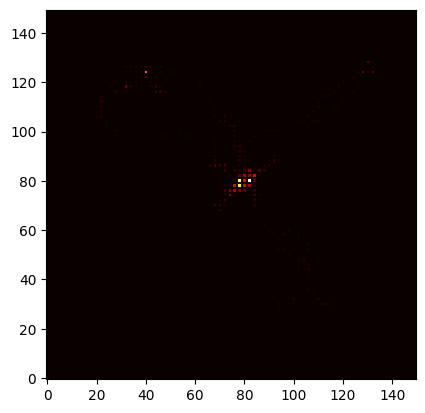

In [50]:
pos_mat = np.zeros(shape=(200, 200), dtype=np.float32)
lane_pos_test = matches_reduced['players'][0][6]['lane_pos']
for key in lane_pos_test.keys():
    for key2 in lane_pos_test[key]:
        col, row = int(key), int(key2)
        pos_mat[row, col] = float(lane_pos_test[key][key2])
#pos_mat[pos_mat == 0] = np.nan
plt.imshow(pos_mat[50:, 50:], origin='lower', interpolation='none', cmap='hot') 

/tmp/ipykernel_16595/3652358029.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('Spectral')


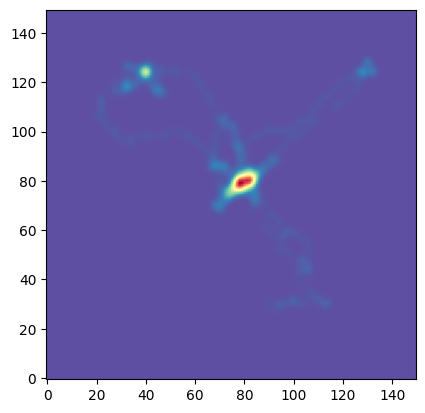

In [51]:
from scipy.ndimage import gaussian_filter
sigma = [1.5, 1.5]
pos_mat_smooth = gaussian_filter(pos_mat, sigma, mode='constant')
orig_map = plt.cm.get_cmap('Spectral')
reverse_map = orig_map.reversed()
plt.imshow(pos_mat_smooth[50:, 50:], origin='lower', cmap=reverse_map)

In [52]:
from PIL import Image

image = Image.open("../../Downloads/reference_heatmap.png")
imarr = np.asarray(image)

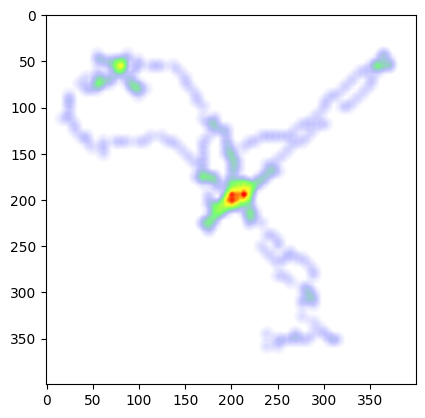

In [53]:
plt.imshow(imarr)

In [54]:
np.max(imarr), np.min(imarr)

(255, 0)

In [55]:
imarr.shape

(400, 400, 4)

In [56]:
np.argmax(imarr) // 400, np.argmax(imarr) % 400, 

(136, 214)

In [57]:
imarr[136, 214]

array([  0,   0, 255,  27], dtype=uint8)

In [76]:
# official valve api instead of third party opendota expirementation
import requests

url = 'http://api.steampowered.com'
match_suffix = '/IDOTA2Match_570/GetMatchDetails/V001/'
api_key = '6F6F6D6D96586240DA42AE1A02974BE9'
match_id = '7033957142'
match_url = f'{url}{match_suffix}?key={api_key}&match_id={match_id}'

test = requests.get(match_url)
test.status_code

200

In [196]:
json.loads(test.content)['result']['players'][0]

{'account_id': 320252024,
 'player_slot': 0,
 'team_number': 0,
 'team_slot': 0,
 'hero_id': 12,
 'item_0': 65,
 'item_1': 63,
 'item_2': 174,
 'item_3': 147,
 'item_4': 160,
 'item_5': 114,
 'backpack_0': 11,
 'backpack_1': 75,
 'backpack_2': 0,
 'item_neutral': 381,
 'kills': 0,
 'deaths': 3,
 'assists': 3,
 'leaver_status': 0,
 'last_hits': 364,
 'denies': 3,
 'gold_per_min': 758,
 'xp_per_min': 723,
 'level': 21,
 'net_worth': 24499,
 'aghanims_scepter': 0,
 'aghanims_shard': 1,
 'moonshard': 0,
 'hero_damage': 8058,
 'tower_damage': 12622,
 'hero_healing': 0,
 'gold': 1394,
 'gold_spent': 24175,
 'scaled_hero_damage': 4787,
 'scaled_tower_damage': 5298,
 'scaled_hero_healing': 0,
 'ability_upgrades': [{'ability': 5065, 'time': 708, 'level': 1},
  {'ability': 5068, 'time': 789, 'level': 2},
  {'ability': 5066, 'time': 865, 'level': 3},
  {'ability': 5068, 'time': 977, 'level': 4},
  {'ability': 5068, 'time': 1060, 'level': 5},
  {'ability': 5067, 'time': 1128, 'level': 6},
  {'abil

# start preprocessing for player features
only useful

In [207]:
useful_features_sorted = sorted(useful_player_stats)
for i in range(1):
    for j in range(10):
        test_var = matches_reduced['players'][i][j][useful_features_sorted[0]]
        dump = json.dumps(test_var, indent=4)
        print(dump)

[
    5065,
    5068,
    5066,
    5068,
    5068,
    5067,
    5068,
    5066,
    5066,
    6400,
    5066,
    5067,
    5065,
    5065,
    6145,
    5065,
    5067,
    6146
]
[
    5605,
    5604,
    5604,
    5605,
    5604,
    5606,
    5604,
    5605,
    5603,
    5605,
    5603,
    5603,
    5603,
    6172,
    6647,
    5606,
    5606,
    353
]
[
    5090,
    5685,
    5685,
    5090,
    5685,
    5093,
    5685,
    5091,
    5090,
    5090,
    1089,
    5093,
    5091,
    5091,
    6628,
    5091,
    5093
]
[
    5566,
    5565,
    7322,
    5565,
    5565,
    5568,
    5565,
    5566,
    5566,
    5566,
    414,
    5568,
    7322,
    7322,
    6411,
    7322
]
[
    5377,
    5379,
    5377,
    5379,
    5377,
    5380,
    5377,
    5378,
    5379,
    6184,
    5379,
    5380,
    5378,
    5378,
    721,
    5378
]
[
    879,
    5601,
    879,
    5601,
    879,
    5599,
    5601,
    879,
    5601,
    6000,
    886,
    5599,
    886,
    886
]
[


In [301]:
# include all simple features
useful_features_simple = [
    'match_id', 'name', 'kills', 'deaths', 'assists'
]

df_players = pd.DataFrame()
for match in matches_reduced['players']:
    match_series = pd.Series(match)
    match_df = pd.DataFrame(match_series.apply(lambda x: x['match_id']).to_list(), columns=['match_id'])
    for simple_feature in useful_features_simple:
        match_df[simple_feature] = match_series.apply(lambda x: x[simple_feature])
    
    df_players = pd.concat([df_players, match_df])
    
df_players.head(20)
#pd.Series(matches_reduced['players'][0]).apply(lambda x: x['match_id'])

,match_id,name,kills,deaths,assists
0,7033957142,shiro,0,3,3
1,7033957142,NothingToSay,10,2,14
2,7033957142,old eLeVeN,8,5,14
3,7033957142,planet,2,6,20
4,7033957142,WhyouSm1Le,8,1,9
5,7033957142,Salad,2,7,8
6,7033957142,Night,4,5,8
7,7033957142,xiaoyu,1,3,7
8,7033957142,Lww,6,7,5
9,7033957142,mks-,4,6,10


In [306]:
df_players.groupby(['name'])['kills'].mean().sort_values(ascending=False)

name
kiyotaka        9.800000
Yatoro雨         9.160000
Mikoto          9.033333
Bryle           8.937500
Wisper          8.807692
                  ...   
Fly             1.740741
Seleri          1.640000
TORONTOTOKYO    1.562500
XCJ             1.500000
jabbz           1.285714
Name: kills, Length: 91, dtype: float64

In [307]:
df_players.groupby(['name'])['deaths'].mean().sort_values(ascending=False)

name
Lww          8.750000
Salad        7.937500
Solo         7.850000
Sneyking     7.789474
XCJ          7.562500
               ...   
shiro        2.947368
Quinn        2.880000
Abed         2.592593
Monet        2.370370
医者watson`    2.227273
Name: deaths, Length: 91, dtype: float64